In [1]:
!pip install cartopy 
!pip install geopandas
import cartopy
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
import pandas as pd
import numpy as np
import plotly.express as px
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature 
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127987 sha256=a8c36010aa5c4cdb9a660bebea2fb74204d4d19cc9b8281ef289be3bf218bddd
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

In [2]:
prism_file= '/content/drive/Shareddrives/PSTAT197/2018_data_usa/prism_usa_2018.nc'
prism_ds = xr.open_dataset(prism_file)

chirps_file= '/content/drive/Shareddrives/PSTAT197/2018_data_usa/chirp_usa_2018.nc'
chirps_ds = xr.open_dataset(chirps_file)

In [28]:
chirps_ds = chirps_ds.sel(time = slice('2018-01-01', '2018-09-30'))

Interpolated PRISM MAP

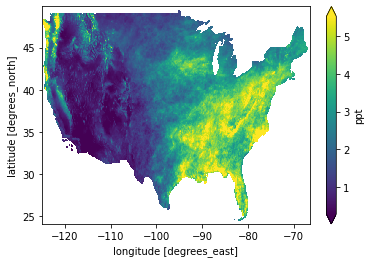

In [29]:
prism_ds.mean('time')['ppt'].plot.pcolormesh(robust = True)
#chirps_ds.mean('time')['ppt'].plot.pcolormesh()

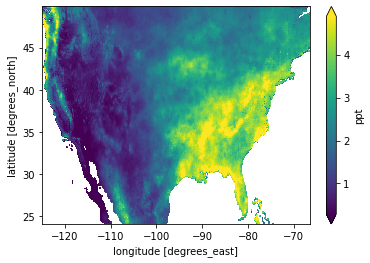

In [30]:
chirps_ds.mean('time')['ppt'].plot.pcolormesh(robust = True)

Look at differences between CHIRPS and PRISM daily averages 

In [31]:
chirps_mean = chirps_ds.mean('time')
prism_mean = prism_ds.mean('time')
difference = chirps_mean - prism_mean

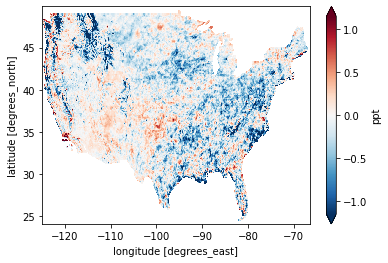

In [32]:
difference['ppt'].plot.pcolormesh(robust=True)

In [ ]:
chirps_mean.quantile([0.1,0.25,0.75, 0.9]) # 10th percentile 0.6872; first quantile 1.107; 3rd quantile 3.098; 90th percentile 4.304

<xarray.Dataset>
Dimensions:   (quantile: 4)
Coordinates:
  * quantile  (quantile) float64 0.1 0.25 0.75 0.9
Data variables:
    ppt       (quantile) float64 0.6872 1.107 3.098 4.304

Look at CHIRPS data <= 2mm. With a different scale, we see more clearly areas with lower daily averages. Take the mean precipitation before setting threshold!

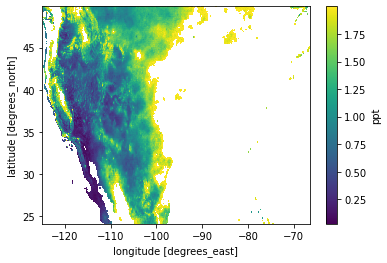

In [35]:
below2mm_chirps = chirps_mean.where(chirps_mean.ppt <= 2)
below2mm_chirps['ppt'].plot.pcolormesh() 


Compare that to PRISM data <= 2mm

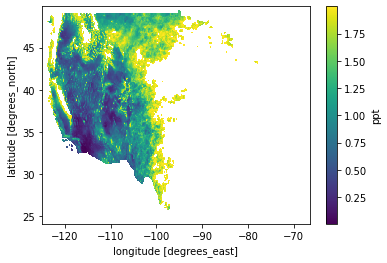

In [36]:
below2mm_prism = prism_mean.where(prism_mean.ppt <= 2)
below2mm_prism['ppt'].plot.pcolormesh() 

In [37]:
prism_ds.mean('time').where(prism_ds.ppt <= 2)

<xarray.Dataset>
Dimensions:    (latitude: 516, longitude: 1170, time: 273)
Coordinates:
  * latitude   (latitude) float32 24.12 24.17 24.22 24.27 ... 49.77 49.82 49.87
  * longitude  (longitude) float32 -125.0 -124.9 -124.9 ... -66.63 -66.58 -66.53
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-09-30
Data variables:
    ppt        (latitude, longitude, time) float64 nan nan nan ... nan nan nan

For ppt <= 2mm: CHIRPS greater than PRISM in southwest. 

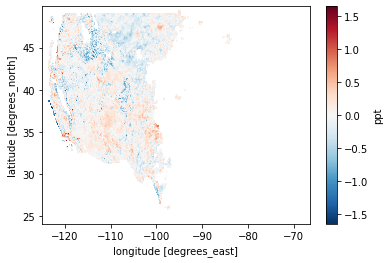

In [38]:
below2mm_difference = below2mm_chirps - below2mm_prism
below2mm_difference['ppt'].plot.pcolormesh() 

Look at ppt >= 5mm

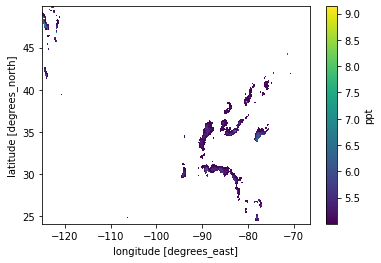

In [39]:
greater5_chirps = chirps_mean.where(chirps_mean.ppt >= 5)
greater5_chirps['ppt'].plot.pcolormesh() 

Let's zoom in on pacific northwest.

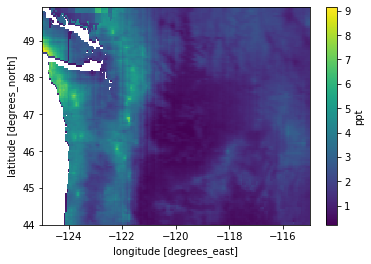

In [40]:
washington = chirps_mean.sel(latitude=slice(44,50), longitude=slice(-126,-115))
washington['ppt'].plot.pcolormesh() 

The South has a high point in South Carolina

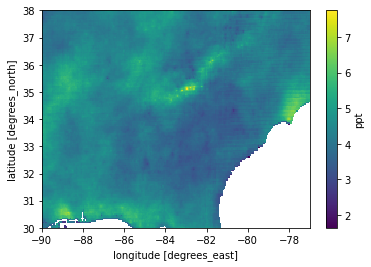

In [41]:
south = chirps_mean.sel(latitude=slice(30,38), longitude=slice(-90,-77))
south['ppt'].plot.pcolormesh() 

Monthly differences in Daily Precipitation

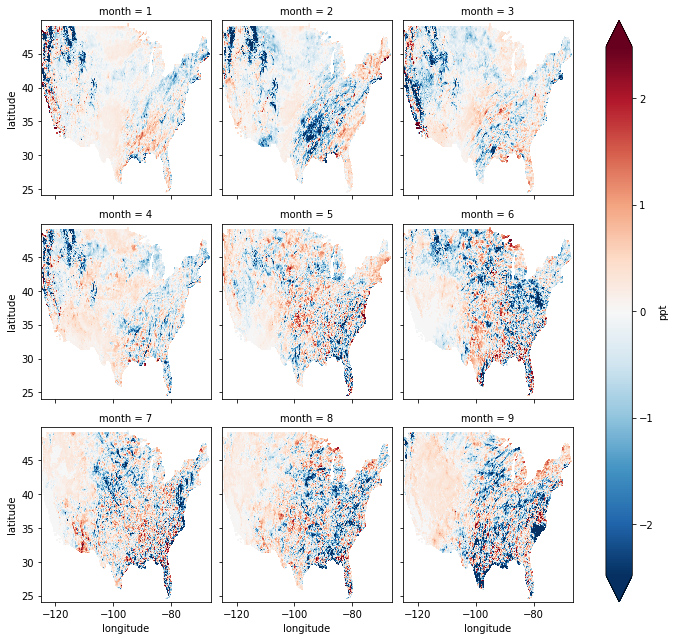

In [42]:
month_difference = chirps_ds.groupby('time.month').mean('time') - prism_ds.groupby('time.month').mean('time')
month_difference['ppt'].plot(x="longitude", y="latitude", col="month", col_wrap=3, robust=True)

Let's look at the differences between sum of rainfall between the datasets. Lots of white - minimal difference. Ignore the red around the borders since no prism data exists there and nothing is being subtracted from CHIRPS outside the USA.

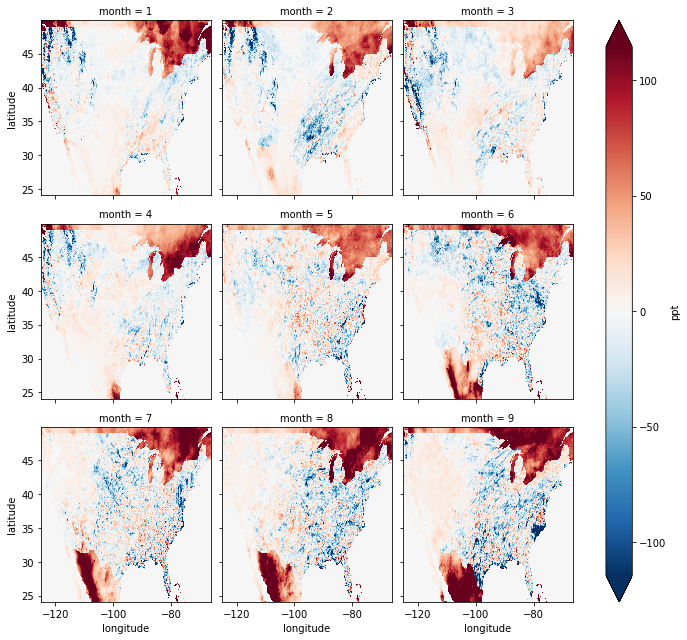

In [43]:
month_rainfall_diff = chirps_ds.groupby('time.month').sum('time') - prism_ds.groupby('time.month').sum('time')
month_rainfall_diff['ppt'].plot(x="longitude", y="latitude", col="month", col_wrap=3, robust=True)

Total rainfall in CHIRPS - need to change the color scale but great visual to see where there is the least total monthly rainfall. We have all the months in CHIRPS, unlike PRISM.

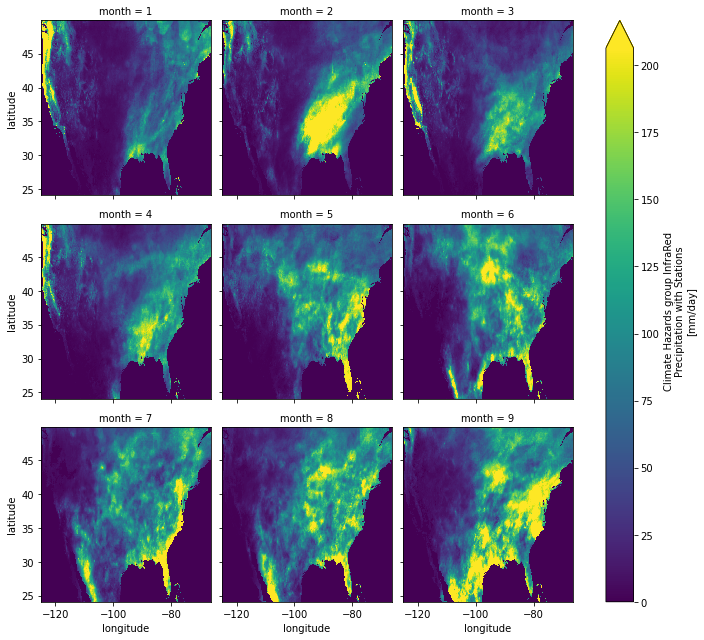

In [44]:
chirps_ds.groupby('time.month').sum('time')['ppt'].plot(x="longitude", y="latitude", col="month", col_wrap=3, robust=True)

Total annual rainfall in CHIRPS

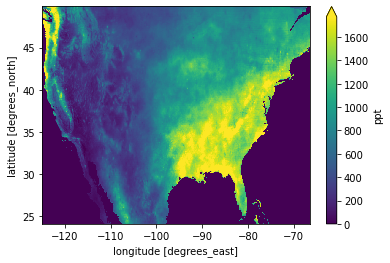

In [ ]:
chirps_ds.sum('time')['ppt'].plot.pcolormesh(robust=True)